<a href="https://colab.research.google.com/github/kimwoonggon/3d-vision-snippet-woong/blob/main/Quaternion_Euler_3D_XYZ_ZYX_Comparision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math as m

In [ ]:
def q_conjugate(q):
    w, x, y, z = q
    return (w, -x, -y, -z)

In [ ]:
def q_mult(q1, q2):
    w1, x1, y1, z1 = q1
    w2, x2, y2, z2 = q2
    w = w1 * w2 - x1 * x2 - y1 * y2 - z1 * z2
    x = w1 * x2 + x1 * w2 + y1 * z2 - z1 * y2
    y = w1 * y2 + y1 * w2 + z1 * x2 - x1 * z2
    z = w1 * z2 + z1 * w2 + x1 * y2 - y1 * x2
    return w, x, y, z

In [ ]:
# 증명은 복잡하나 이해 가능하다.
# 회전축은 q에 녹아있다. v가 옮길 점임
def qv_mult(q1, v1):
    q2 = (0.0,) + v1
    return q_mult(q_mult(q1, q2), q_conjugate(q1))[1:]

In [ ]:
def euler_to_quaternion(phi, theta, psi):

        qw = m.cos(phi/2) * m.cos(theta/2) * m.cos(psi/2) + m.sin(phi/2) * m.sin(theta/2) * m.sin(psi/2)
        qx = m.sin(phi/2) * m.cos(theta/2) * m.cos(psi/2) - m.cos(phi/2) * m.sin(theta/2) * m.sin(psi/2)
        qy = m.cos(phi/2) * m.sin(theta/2) * m.cos(psi/2) + m.sin(phi/2) * m.cos(theta/2) * m.sin(psi/2)
        qz = m.cos(phi/2) * m.cos(theta/2) * m.sin(psi/2) - m.sin(phi/2) * m.sin(theta/2) * m.cos(psi/2)

        return [qw, qx, qy, qz]

In [ ]:
def quaternion_to_euler(w, x, y, z):

        t0 = 2 * (w * x + y * z)
        t1 = 1 - 2 * (x * x + y * y)
        X = m.atan2(t0, t1)

        t2 = 2 * (w * y - z * x)
        t2 = 1 if t2 > 1 else t2
        t2 = -1 if t2 < -1 else t2
        Y = m.asin(t2)

        t3 = 2 * (w * z + x * y)
        t4 = 1 - 2 * (y * y + z * z)
        Z = m.atan2(t3, t4)

        return X, Y, Z

# Example Case (XYZ 오일러 컨벤션에서)

In [ ]:
v1 = (1,0,0)
phi = m.pi/4
theta = m.pi/6
psi = m.pi/3
q = euler_to_quaternion(phi, theta, psi)
print("w =", q[0])
print("x =", q[1])
print("y =", q[2])
print("z =", q[3])
v2 = qv_mult(q,v1)
print("orig : ", v1)
print("rotated : ", v2)

w = 0.8223631719059994
x = 0.20056212114657512
y = 0.3919038373291199
z = 0.3604234056503559
orig :  (1, 0, 0)
rotated :  (0.43301270189221963, 0.75, -0.49999999999999994)


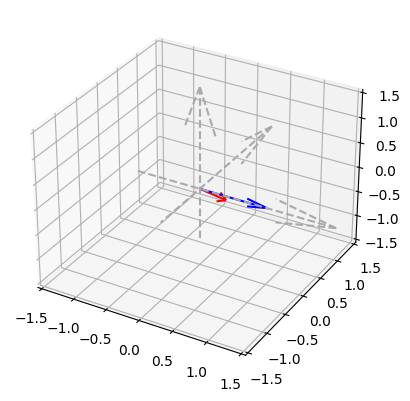

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Cartesian axes
ax.quiver(-1, 0, 0, 3, 0, 0, color='#aaaaaa',linestyle='dashed')
ax.quiver(0, -1, 0, 0,3, 0, color='#aaaaaa',linestyle='dashed')
ax.quiver(0, 0, -1, 0, 0, 3, color='#aaaaaa',linestyle='dashed')
# Vector before rotation
ax.quiver(0, 0, 0, 1, 0, 0, color='b')
# Vector after rotation
ax.quiver(0, 0, 0, 0, 0.71, -0.71, color='r')
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
ax.set_zlim([-1.5, 1.5])
plt.show()

# XYZ 컨벤션 시 실험

In [ ]:
import numpy as np
from scipy.spatial.transform import Rotation

# The given 3D rotation
euler = (45, 30, 60) # Unit: [deg] in the XYZ-order

# Generate 3D rotation object
robj = Rotation.from_euler('xyz', euler, degrees=True)

# Print other representations
print('\n## Euler Angle (XYZ)')
print(np.rad2deg(robj.as_euler('xyz'))) # [45, 30, 60] [deg] in the XYZ-order
print('\n## Rotation Matrix')
print(robj.as_matrix())
print('\n## Rotation Vector')
print(robj.as_rotvec())                 # [0.4267, 0.8337, 0.7668]
print('\n## Quaternion (XYZW)')
print(robj.as_quat())                   # [0.20, 0.39, 0.36, 0.82]

# Original vector
v = np.array([1, 0, 0])

# Apply the rotation to the vector
rotated_v = robj.apply(v)

print('Original Vector:')
print(v)

print('Rotated Vector:')
print(rotated_v)


## Euler Angle (XYZ)
[45. 30. 60.]

## Rotation Matrix
[[ 0.4330127  -0.43559574  0.78914913]
 [ 0.75        0.65973961 -0.04736717]
 [-0.5         0.61237244  0.61237244]]

## Rotation Vector
[0.42670289 0.83378905 0.76681334]

## Quaternion (XYZW)
[0.20056212 0.39190384 0.36042341 0.82236317]
Original Vector:
[1 0 0]
Rotated Vector:
[ 0.4330127  0.75      -0.5      ]


# 그렇다면 ZYX 컨벤션의 경우에 검산을 해 보자  
## XYZ 컨벤션과 ZYX 컨벤션의 결과가 다름을 알 수 있다

In [ ]:
# XYZ면 성립하는데 ZYX에서는 성립하지 않는다

In [ ]:
import numpy as np
from scipy.spatial.transform import Rotation

# The given 3D rotation
euler = (45, 30, 60) # Unit: [deg] in the XYZ-order

# Generate 3D rotation object
robj = Rotation.from_euler('zyx', euler[::-1], degrees=True)

# Print other representations
print('\n## Euler Angle (ZYX)')
print(np.rad2deg(robj.as_euler('zyx'))) # [60, 30, 45] [deg] in the ZYX-order
print('\n## Rotation Matrix')
print(robj.as_matrix())
print('\n## Rotation Vector')
print(robj.as_rotvec())                 # [0.97, 0.05, 1.17]
print('\n## Quaternion (XYZW)')
print(robj.as_quat())                   # [0.44, 0.02, 0.53, 0.72]

euler_zyx = robj.as_euler('zyx', degrees=True)
print('Euler Angles (ZYX):')
print(euler_zyx)

# Original vector
v = np.array([1, 0, 0])

# Apply the rotation to the vector
rotated_v = robj.apply(v)

print('Original Vector:')
print(v)

print('Rotated Vector:')
print(rotated_v)


## Euler Angle (ZYX)
[60. 30. 45.]

## Rotation Matrix
[[ 0.4330127  -0.75        0.5       ]
 [ 0.78914913  0.04736717 -0.61237244]
 [ 0.43559574  0.65973961  0.61237244]]

## Rotation Vector
[0.97065042 0.04914191 1.17440579]

## Quaternion (XYZW)
[0.43967974 0.02226003 0.5319757  0.72331741]
Euler Angles (ZYX):
[60. 30. 45.]
Original Vector:
[1 0 0]
Rotated Vector:
[0.4330127  0.78914913 0.43559574]


In [ ]:
# Quaternion to euler
#각은 역이 아니다
#컨벤션 잘 맞추는게 핵심임
quaternion_to_euler(0.72331741,0.43967974,0.02226003,0.5319757)

(0.8226160363108249, -0.45069999996394067, 1.0689453566206435)

In [ ]:
v1 = (1,0,0)
phi = 0.8226160363108249
theta =  -0.45069999996394067
psi = 1.0689453566206435
q = euler_to_quaternion(phi, theta, psi)
print("w =", q[0])
print("x =", q[1])
print("y =", q[2])
print("z =", q[3])
v2 = qv_mult(q,v1)
print(v2)

w = 0.7233174067040553
x = 0.43967974057490455
y = 0.022260030823712723
z = 0.5319757004926374
(0.43301269022619016, 0.7891491373753343, 0.43559574043239147)


In [ ]:
import numpy as np
from scipy.spatial.transform import Rotation

# The given 3D rotation
euler = (90, 45, 90) # Unit: [deg] in the XYZ-order

# Generate 3D rotation object
robj = Rotation.from_euler('xyz', euler, degrees=True)

# Print other representations
print('\n## Euler Angle (XYZ)')
print(np.rad2deg(robj.as_euler('xyz'))) # [90, 45, 90] [deg] in the ZYX-order
print('\n## Rotation Matrix')
print(robj.as_matrix())
print('\n## Rotation Vector')
print(robj.as_rotvec())                 # [0.97, 0.05, 1.17]
print('\n## Quaternion (XYZW)')
print(robj.as_quat())


## Euler Angle (XYZ)
[90. 45. 90.]

## Rotation Matrix
[[ 1.11022302e-16 -1.11022302e-16  1.00000000e+00]
 [ 7.07106781e-01  7.07106781e-01  0.00000000e+00]
 [-7.07106781e-01  7.07106781e-01  2.22044605e-16]]

## Rotation Vector
[0.61394313 1.48218982 0.61394313]

## Quaternion (XYZW)
[0.27059805 0.65328148 0.27059805 0.65328148]


In [ ]:
robj.apply([1,0,0])

array([ 1.11022302e-16,  7.07106781e-01, -7.07106781e-01])

In [ ]:
#w = 0.6532814824381883
#x = 0.27059805007309845
#y = 0.6532814824381882
#z = 0.2705980500730985